# Day 6

- [https://adventofcode.com/2019/day/6](https://adventofcode.com/2019/day/6)

```text
--- Day 6: Universal Orbit Map ---

You've landed at the Universal Orbit Map facility on Mercury. Because navigation in space often involves transferring between orbits, the orbit maps here are useful for finding efficient routes between, for example, you and Santa. You download a map of the local orbits (your puzzle input).

Except for the universal Center of Mass (COM), every object in space is in orbit around exactly one other object. An orbit looks roughly like this:

                  \
                   \
                    |
                    |
AAA--> o            o <--BBB
                    |
                    |
                   /
                  /

In this diagram, the object BBB is in orbit around AAA. The path that BBB takes around AAA (drawn with lines) is only partly shown. In the map data, this orbital relationship is written AAA)BBB, which means "BBB is in orbit around AAA".

Before you use your map data to plot a course, you need to make sure it wasn't corrupted during the download. To verify maps, the Universal Orbit Map facility uses orbit count checksums - the total number of direct orbits (like the one shown above) and indirect orbits.

Whenever A orbits B and B orbits C, then A indirectly orbits C. This chain can be any number of objects long: if A orbits B, B orbits C, and C orbits D, then A indirectly orbits D.

For example, suppose you have the following map:

COM)B
B)C
C)D
D)E
E)F
B)G
G)H
D)I
E)J
J)K
K)L

Visually, the above map of orbits looks like this:

        G - H       J - K - L
       /           /
COM - B - C - D - E - F
               \
                I

In this visual representation, when two objects are connected by a line, the one on the right directly orbits the one on the left.

Here, we can count the total number of orbits as follows:

    D directly orbits C and indirectly orbits B and COM, a total of 3 orbits.
    L directly orbits K and indirectly orbits J, E, D, C, B, and COM, a total of 7 orbits.
    COM orbits nothing.

The total number of direct and indirect orbits in this example is 42.

What is the total number of direct and indirect orbits in your map data?

```

In [1]:
# Python imports
from pathlib import Path

import networkx as nx

from aoc2019 import run_tests
from aoc2019.orbits import (count_node_orbits, count_orbital_transfers,
                            count_orbits, network_from_orbits,
                            read_orbits, parse_orbits)

## Tests

In [2]:
# Check orbit parsing
orbit_defn = ["COM)B", "B)C", "C)D", "D)E", "E)F", "B)G", "G)H", "D)I", "E)J", "J)K", "K)L"]
orbits = parse_orbits(orbit_defn)
list(orbits)

[('COM', 'B'),
 ('B', 'C'),
 ('C', 'D'),
 ('D', 'E'),
 ('E', 'F'),
 ('B', 'G'),
 ('G', 'H'),
 ('D', 'I'),
 ('E', 'J'),
 ('J', 'K'),
 ('K', 'L')]

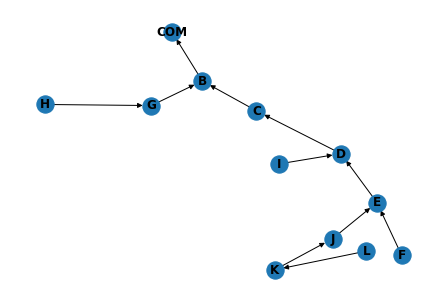

In [3]:
# Check production of graph from orbits
orbit_graph = network_from_orbits(parse_orbits(orbit_defn))
nx.draw(orbit_graph, with_labels=True, font_weight='bold')

In [4]:
# Counts of orbits for a node
expected = [([orbit_graph, "D"], 3),
            ([orbit_graph, "L"], 7)]
run_tests(count_node_orbits, expected)

Input: [<networkx.classes.digraph.DiGraph object at 0x11496c550>, 'D']
	Expected: 3
	Returned: 3
Input: [<networkx.classes.digraph.DiGraph object at 0x11496c550>, 'L']
	Expected: 7
	Returned: 7


True

In [5]:
# Count of all orbits in the graph
expected = [(orbit_graph, 42)]
run_tests(count_orbits, expected)

Input: 
	Expected: 42
	Returned: 42


True

## Challenge Part 1

- Puzzle input is obtained from [https://adventofcode.com/2019/day/6](https://adventofcode.com/2019/day/6)

In [6]:
# Solve challenge
big_orbit_graph = read_orbits(Path("day06.txt"))
count_orbits(big_orbit_graph)

358244

## Challenge Part 2

```text
--- Part Two ---

Now, you just need to figure out how many orbital transfers you (YOU) need to take to get to Santa (SAN).

You start at the object YOU are orbiting; your destination is the object SAN is orbiting. An orbital transfer lets you move from any object to an object orbiting or orbited by that object.

For example, suppose you have the following map:

COM)B
B)C
C)D
D)E
E)F
B)G
G)H
D)I
E)J
J)K
K)L
K)YOU
I)SAN

Visually, the above map of orbits looks like this:

                          YOU
                         /
        G - H       J - K - L
       /           /
COM - B - C - D - E - F
               \
                I - SAN

In this example, YOU are in orbit around K, and SAN is in orbit around I. To move from K to I, a minimum of 4 orbital transfers are required:

    K to J
    J to E
    E to D
    D to I

Afterward, the map of orbits looks like this:

        G - H       J - K - L
       /           /
COM - B - C - D - E - F
               \
                I - SAN
                 \
                  YOU

What is the minimum number of orbital transfers required to move from the object YOU are orbiting to the object SAN is orbiting? (Between the objects they are orbiting - not between YOU and SAN.)
```

## Tests

In [7]:
# Check orbital transfers
expected = [([orbit_graph, "K", "I"], 4)]
run_tests(count_orbital_transfers, expected)

Input: [<networkx.classes.digraph.DiGraph object at 0x11496c550>, 'K', 'I']
	Expected: 4
	Returned: 4


True

In [8]:
# Solve puzzle

# count_orbital_transfers returns distance from "YOU" to "SAN",
# not between the objects they orbit. We still need to subtract
# two from this value (the paths from YOU, SAN to the objects
# they orbit)
dist = count_orbital_transfers(big_orbit_graph, "YOU", "SAN")
print(dist - 2)

517
